In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

In [2]:
df = pd.read_csv('house.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [5]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [6]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [7]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

<Axes: xlabel='House_Price', ylabel='Count'>

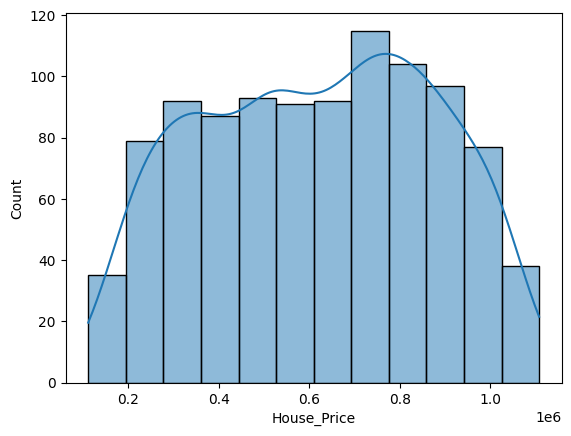

In [8]:
sns.histplot(data=df, x='House_Price',kde=True)

<Axes: >

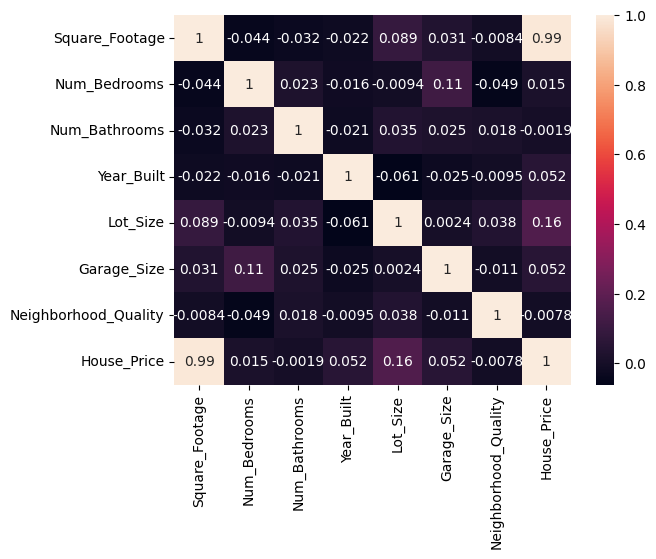

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [10]:
df = df.drop(['Num_Bathrooms','Neighborhood_Quality'], axis=1)


In [11]:
# Compute correlation matrix
corr_matrix = df.corr()

# Extract correlation values for House_Price
price_corr = corr_matrix['House_Price'].sort_values()

print("===== Correlation of Features with House Price =====")
print(price_corr)

===== Correlation of Features with House Price =====
Num_Bedrooms      0.014633
Year_Built        0.051967
Garage_Size       0.052133
Lot_Size          0.160412
Square_Footage    0.991261
House_Price       1.000000
Name: House_Price, dtype: float64


In [12]:
df_encode = df.copy()

In [13]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Square_Footage','Lot_Size','Year_Built','Garage_Size']
scaler= StandardScaler()
df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])
df_encode.head()

,Square_Footage,Num_Bedrooms,Year_Built,Lot_Size,Garage_Size,House_Price
0,-1.159803,2,-0.269122,-1.679278,-1.254658,2.623829e+05
1,1.160724,3,1.428045,1.522390,-0.027008,9.852609e+05
2,0.618843,1,1.428045,0.660422,-1.254658,7.779774e+05
3,-1.473776,1,-0.463084,-0.036555,-0.027008,2.296989e+05
4,1.681887,2,0.312764,1.480809,-1.254658,1.041741e+06


In [14]:
df_encode.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Year_Built', 'Lot_Size',
       'Garage_Size', 'House_Price'],
      dtype='object')

In [30]:
from scipy.stats import pearsonr as psn

# ------------------------------------
# Pearsonr Correlation Calculation 
# ------------------------------------

# List of features to check against target 
selected_features = ['Square_Footage', 'Num_Bedrooms', 'Year_Built', 'Lot_Size',
       'Garage_Size']

correlations = {
    feature:psn(df_encode[feature], df_encode['House_Price'])[0]
    for feature in selected_features
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Parameters', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Parameters,Pearson Correlation
0,Square_Footage,0.991261
3,Lot_Size,0.160412
4,Garage_Size,0.052133
2,Year_Built,0.051967
1,Num_Bedrooms,0.014633


In [31]:
# Compute correlation matrix
corr_matrix = df_encode.corr()

# Extract correlation values for House_Price
price_corr = corr_matrix['House_Price'].sort_values()

print("===== Correlation of Features with House Price =====")
print(price_corr)


===== Correlation of Features with House Price =====
Num_Bedrooms      0.014633
Year_Built        0.051967
Garage_Size       0.052133
Lot_Size          0.160412
Square_Footage    0.991261
House_Price       1.000000
Name: House_Price, dtype: float64


In [35]:
final = df[['Square_Footage', 'Num_Bedrooms' ,'Year_Built', 'Lot_Size', 'Garage_Size',
       'House_Price']]
final.head()

,Square_Footage,Num_Bedrooms,Year_Built,Lot_Size,Garage_Size,House_Price
0,1360,2,1981,0.599637,0,2.623829e+05
1,4272,3,2016,4.753014,1,9.852609e+05
2,3592,1,2016,3.634823,0,7.779774e+05
3,966,1,1977,2.730667,1,2.296989e+05
4,4926,2,1993,4.699073,0,1.041741e+06


# Train And Test Split

In [36]:
correlations = final.corr()['House_Price'].sort_values()
correlations

Num_Bedrooms      0.014633
Year_Built        0.051967
Garage_Size       0.052133
Lot_Size          0.160412
Square_Footage    0.991261
House_Price       1.000000
Name: House_Price, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

X = final.drop(columns=['House_Price'])
y = final['House_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
X_train.dtypes

Square_Footage      int64
Num_Bedrooms        int64
Year_Built          int64
Lot_Size          float64
Garage_Size         int64
dtype: object

In [39]:
from sklearn.linear_model import LinearRegression

X_train = X_train.astype(float)
X_test = X_test.astype(float)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9976614912822687

In [41]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - ((1-r2)*(n-1)/(n-p-1))
adjusted_r2

0.9976012204390282

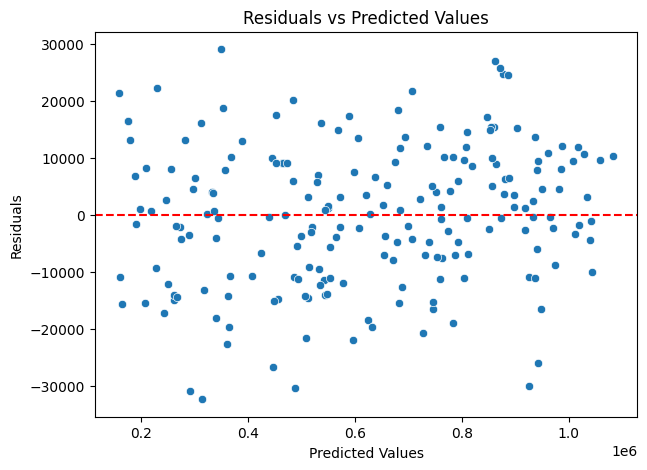

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [25]:
!pip install statsmodels

In [43]:
import sys
print(sys.executable)

C:\Users\Sanskriti Dutta\AppData\Local\Programs\Python\Python311\python.exe


In [44]:
import statsmodels
print(statsmodels.__version__)


0.14.5


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_train.values, i)
    for i in range(len(X_train.columns))
]

print(vif_data)


          Feature        VIF
0  Square_Footage   6.161154
1    Num_Bedrooms   5.456449
2      Year_Built  15.103764
3        Lot_Size   5.750902
4     Garage_Size   2.578464


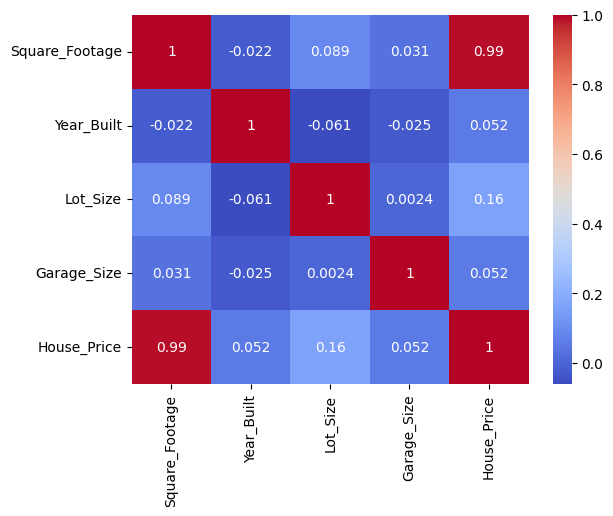

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[['Square_Footage','Year_Built','Lot_Size','Garage_Size','House_Price']].corr(), annot=True, cmap='coolwarm')
plt.show()
